# *Objective*

The Iris flower classification dataset comprises a total of 150 samples of Iris flowers, which are divided into three distinct species:

1). Iris setosa
2). Iris versicolor
3). Iris virginica

The primary objective of this project is to develop a machine learning model capable of accurately classifying iris flowers into one of three species: Setosa, Versicolor, and Virginica, based on their morphological features. This involves the following key goals:

1. Data Exploration and Preprocessing: Analyze the Iris dataset to understand the distribution of features and handle any missing or inconsistent data.

2. Feature Engineering: Identify and select the most relevant features that contribute significantly to the classification task.

3. Model Development: Implement various classification algorithms, such as Logistic Regression and k-Nearest Neighbors, to find the most effective model.

4. Model Evaluation: Assess the performance of each model using appropriate metrics such as accuracy, precision, recall, and F1-score to ensure robust classification.

5. Visualization and Interpretation: Visualize the results and decision boundaries of the models to interpret their behavior and understand their decision-making process.

By achieving these goals, the project aims to demonstrate the application of machine learning techniques in solving a classical classification problem and provide insights into the strengths and limitations of different algorithms in this context.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
31,32,5.4,3.4,1.5,0.4,Iris-setosa
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
94,95,5.6,2.7,4.2,1.3,Iris-versicolor


In [5]:
iris.isnull().mean()

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

# *Data Preprocessing*

In [6]:
iris.drop(columns=['Id'],inplace=True)

In [7]:
iris 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# *Data Visualization*

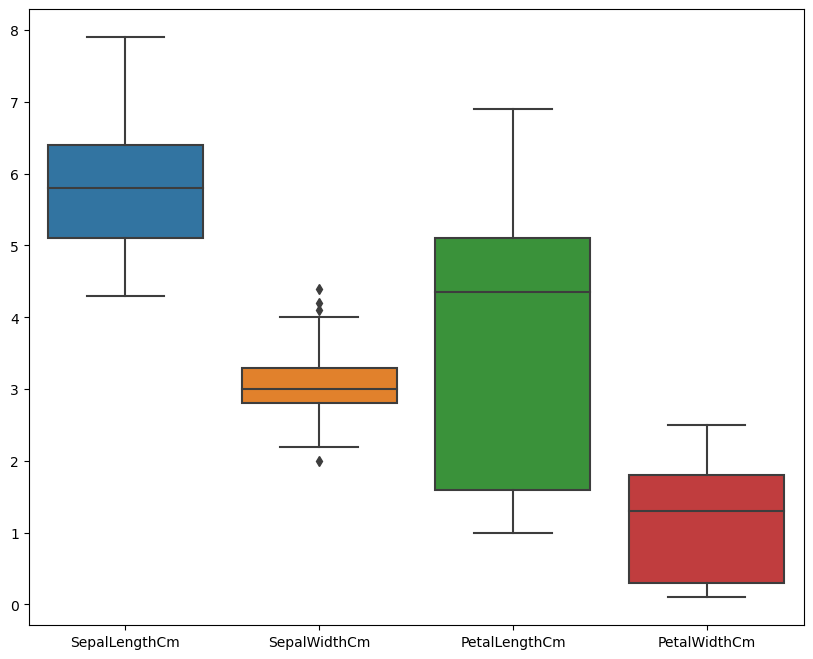

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=iris)
plt.show()

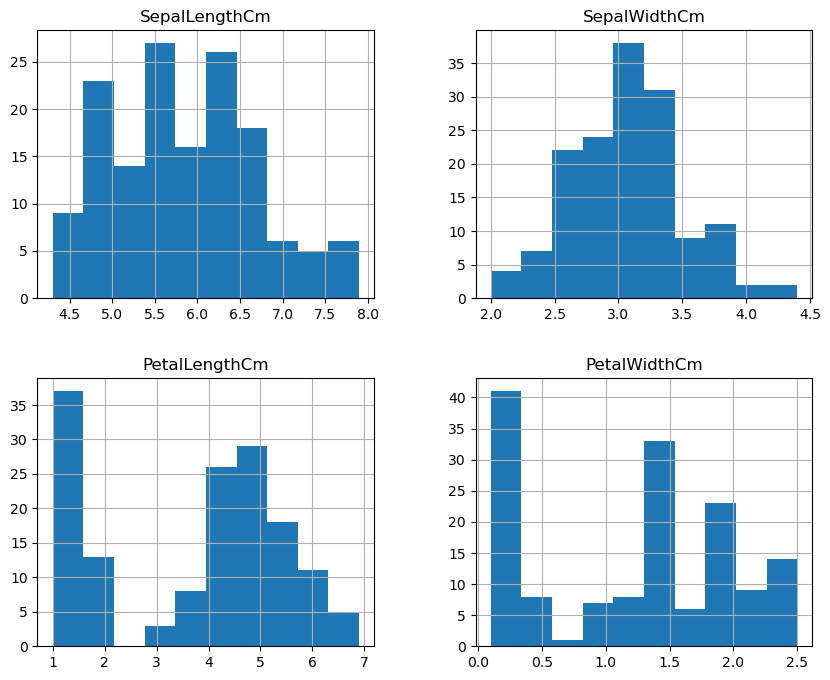

In [10]:
iris.hist(figsize=(10, 8))
plt.show()

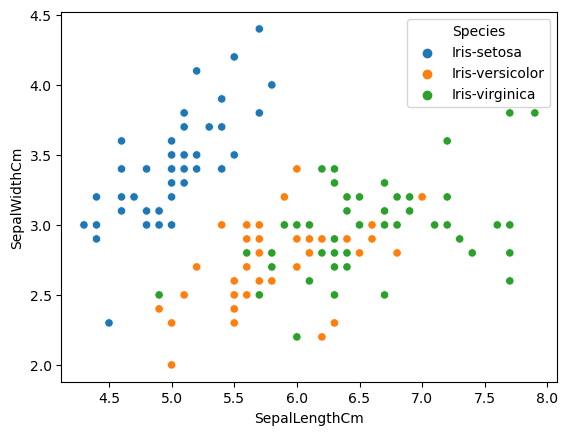

In [11]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris)
plt.show()

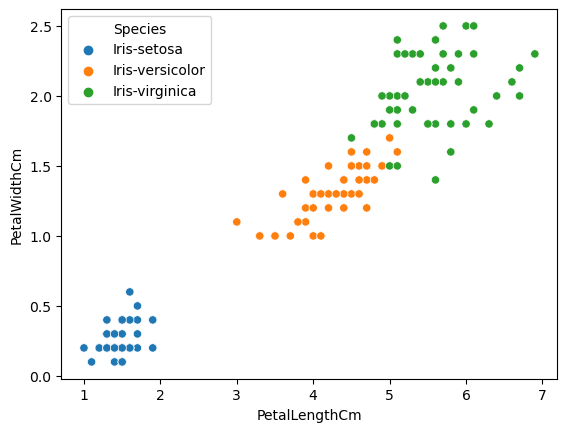

In [12]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=iris)
plt.show()

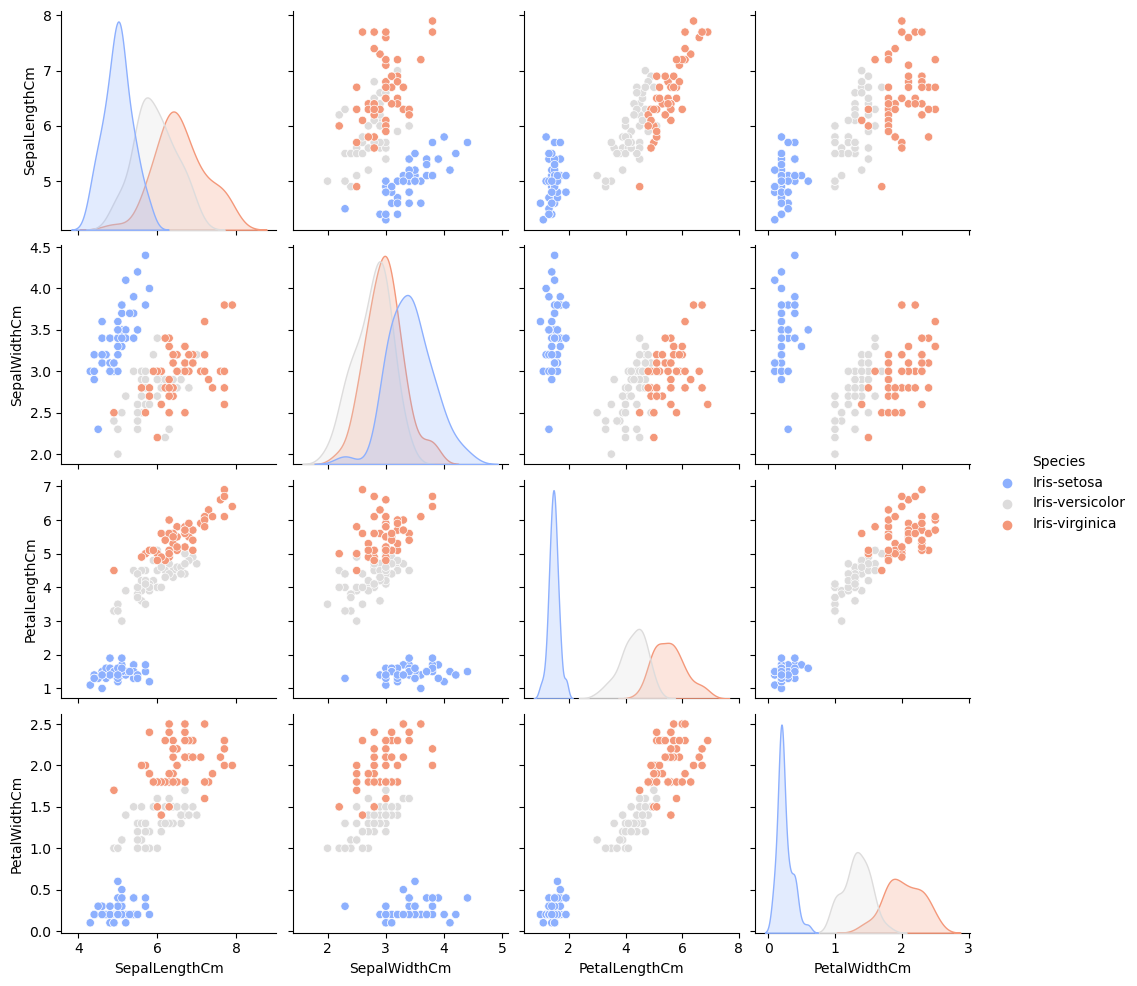

In [13]:
sns.pairplot(iris, hue='Species', palette='coolwarm')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13020\2437059733.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot=True, cmap='coolwarm')


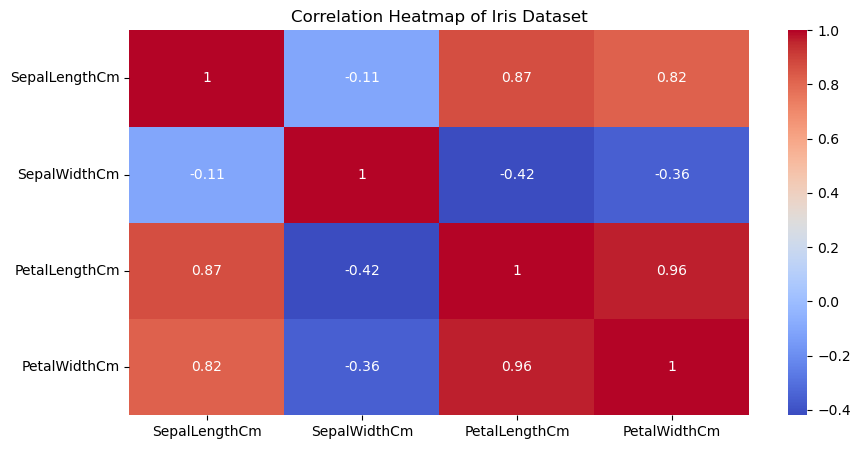

In [14]:
plt.figure(figsize=(10, 5))
sns.heatmap(iris.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

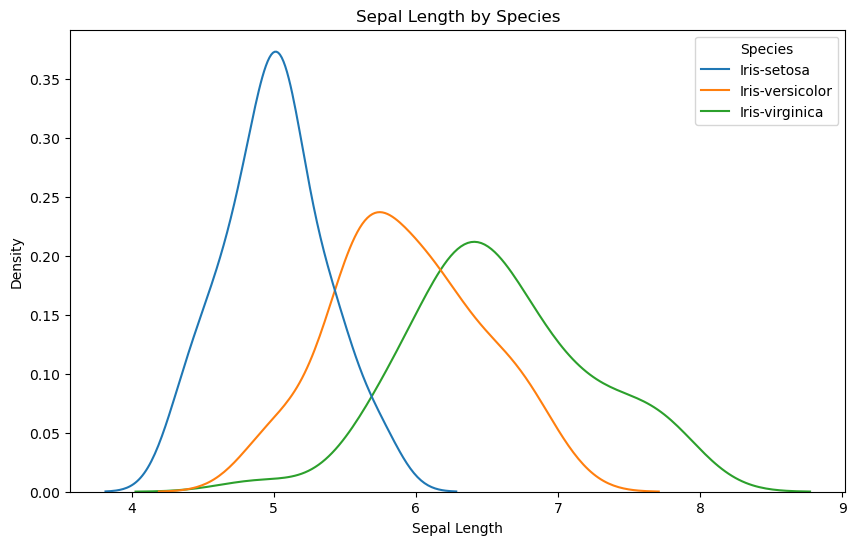

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=iris, x='SepalLengthCm', hue='Species')
plt.title('Sepal Length by Species')
plt.xlabel('Sepal Length')
plt.ylabel('Density')
plt.show()


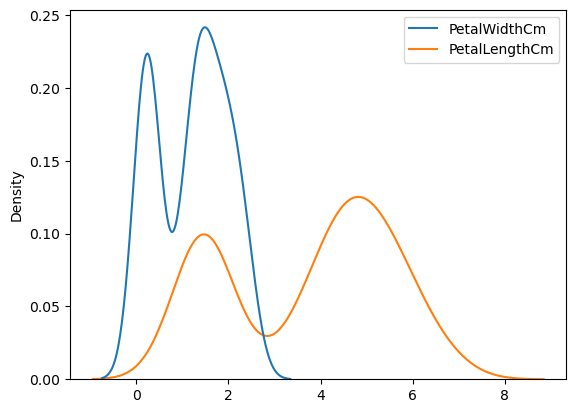

In [16]:
sns.kdeplot(iris[['PetalWidthCm', 'PetalLengthCm']])
plt.show()

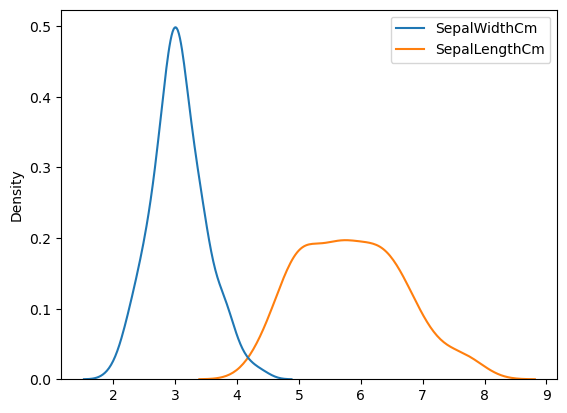

In [17]:
sns.kdeplot(iris[['SepalWidthCm', 'SepalLengthCm']])
plt.show()

# *Model Building*

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [19]:
X = iris.drop(columns=['Species'])
y = iris['Species']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)

In [23]:
print("Accuracy score of Logistic Regression: ", accuracy_score(y_test, y_pred)*100)

Accuracy score of Logistic Regression:  100.0


In [24]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
y_pred1 = knn.predict(X_test)
print("Accuracy score of KNN: ", accuracy_score(y_test, y_pred1)*100)

Accuracy score of KNN:  100.0


In [27]:
print(classification_report(y_test, y_pred1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



# *Conclusion*

As you can see, we're getting 100% accuracy even if we apply LabelEncoding or not. So we'll go with any of these both model.

In [28]:
test_data = pd.DataFrame({'SepalLengthCm':[6.0],'SepalWidthCm':[3.2],'PetalLengthCm':[5.0],'PetalWidthCm':[2.0]})

In [31]:
pred1 = lr.predict(test_data)
pred1[0]

'Iris-virginica'

In [32]:
pred2 = knn.predict(test_data)
pred2[0]

'Iris-virginica'

# *Saving Model*

In [33]:
import pickle

with open('iris_model_lr.pkl', 'wb') as file:
    pickle.dump(lr, file)